<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Data-Fetching" data-toc-modified-id="Data-Fetching-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Fetching</a></span></li><li><span><a href="#Data-Scrubbing" data-toc-modified-id="Data-Scrubbing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Scrubbing</a></span></li><li><span><a href="#Data-cleaning" data-toc-modified-id="Data-cleaning-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data cleaning</a></span><ul class="toc-item"><li><span><a href="#Data-readability" data-toc-modified-id="Data-readability-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Data readability</a></span></li><li><span><a href="#Missing-values" data-toc-modified-id="Missing-values-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Missing values</a></span></li><li><span><a href="#Duplicates" data-toc-modified-id="Duplicates-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Duplicates</a></span></li></ul></li><li><span><a href="#Data-selection" data-toc-modified-id="Data-selection-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data selection</a></span></li><li><span><a href="#ML-Building" data-toc-modified-id="ML-Building-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>ML Building</a></span><ul class="toc-item"><li><span><a href="#Data-Splitting" data-toc-modified-id="Data-Splitting-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Data Splitting</a></span><ul class="toc-item"><li><span><a href="#Train/test-sets-distribution" data-toc-modified-id="Train/test-sets-distribution-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Train/test sets distribution</a></span><ul class="toc-item"><li><span><a href="#Numerical-features-distribution" data-toc-modified-id="Numerical-features-distribution-6.1.1.1"><span class="toc-item-num">6.1.1.1&nbsp;&nbsp;</span>Numerical features distribution</a></span></li></ul></li></ul></li><li><span><a href="#Preprocessing-pipeline" data-toc-modified-id="Preprocessing-pipeline-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Preprocessing pipeline</a></span><ul class="toc-item"><li><span><a href="#Encoding" data-toc-modified-id="Encoding-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Encoding</a></span></li><li><span><a href="#Scaling" data-toc-modified-id="Scaling-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>Scaling</a></span></li><li><span><a href="#Outliers-treatment" data-toc-modified-id="Outliers-treatment-6.2.3"><span class="toc-item-num">6.2.3&nbsp;&nbsp;</span>Outliers treatment</a></span></li></ul></li><li><span><a href="#Baseline-preprocessing" data-toc-modified-id="Baseline-preprocessing-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Baseline preprocessing</a></span></li><li><span><a href="#Model-Instantiation" data-toc-modified-id="Model-Instantiation-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Model Instantiation</a></span><ul class="toc-item"><li><span><a href="#Performance" data-toc-modified-id="Performance-6.4.1"><span class="toc-item-num">6.4.1&nbsp;&nbsp;</span>Performance</a></span></li></ul></li></ul></li><li><span><a href="#ML-Tuning" data-toc-modified-id="ML-Tuning-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>ML Tuning</a></span></li></ul></div>

# Libraries

In [1]:
import os
from IPython.display import SVG

# visualisation
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (13,8)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras import backend as K, Model, Input

# pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn import set_config; set_config(display='diagram')

# evaluation metrics


# tuning


# generalization


# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Data Fetching

In [2]:
csv_path = os.path.join('../data/raw/data.csv')

In [3]:
df_raw = pd.read_csv(csv_path)

# Data Scrubbing

In [14]:
df_raw.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [9]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [10]:
df_raw.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


# Data cleaning

## Data readability

In [4]:
df_raw.columns = [col.lower() for col in df_raw.columns]

In [5]:
df_raw.columns = [col.replace(" ", "_") for col in df_raw.columns]

In [6]:
df_raw = df_raw.rename(columns={"superplasticizer" : "super_plasticizer"})

In [7]:
df_raw

,cement,blast_furnace_slag,fly_ash,water,super_plasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


## Missing values

In [24]:
df_raw.isnull().sum()

cement                0
blast_furnace_slag    0
fly_ash               0
water                 0
super_plasticizer     0
coarse_aggregate      0
fine_aggregate        0
age                   0
strength              0
dtype: int64

## Duplicates

In [29]:
df_raw[df_raw.duplicated(keep="first")]

,cement,blast_furnace_slag,fly_ash,water,super_plasticizer,coarse_aggregate,fine_aggregate,age,strength
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
111,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
123,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28,60.29


In [8]:
df_raw = df_raw.drop_duplicates()

In [65]:
df_raw.duplicated().value_counts()

False    1005
dtype: int64

---------------

In [9]:
# define cleaned dataset
df = df_raw

In [67]:
# export cleaned dataset into csv format
df.to_csv('../data/processed/data.csv')

# Data selection

Only numeric features on this dataset.

# ML Building

## Data Splitting

In [10]:
X = df.drop("strength", axis=1)
y = df["strength"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Train/test sets distribution

It's important to compare the distribution of both train and test sets.
If the test set is very specific to certain features, the model will under-fit and have a low accuracy.

#### Numerical features distribution

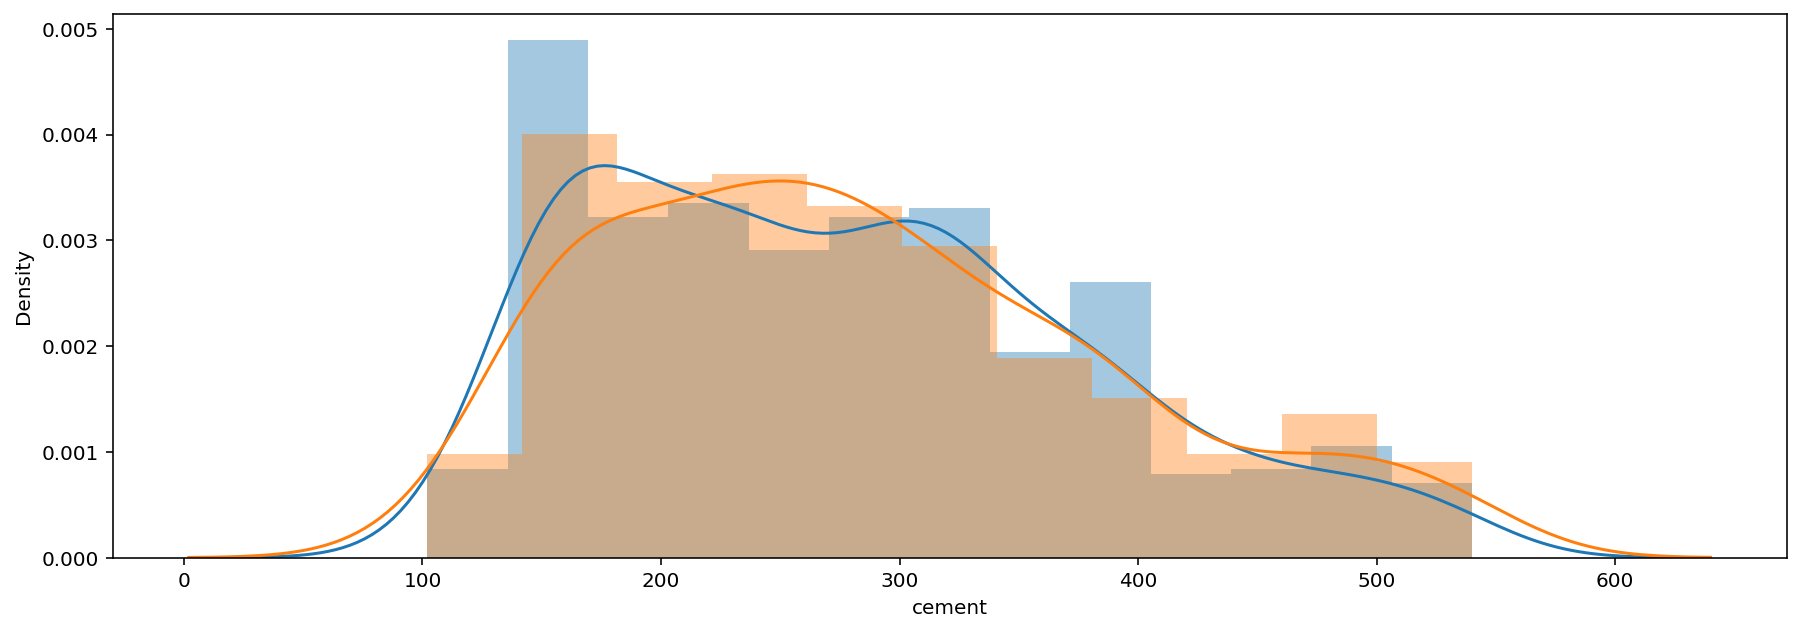

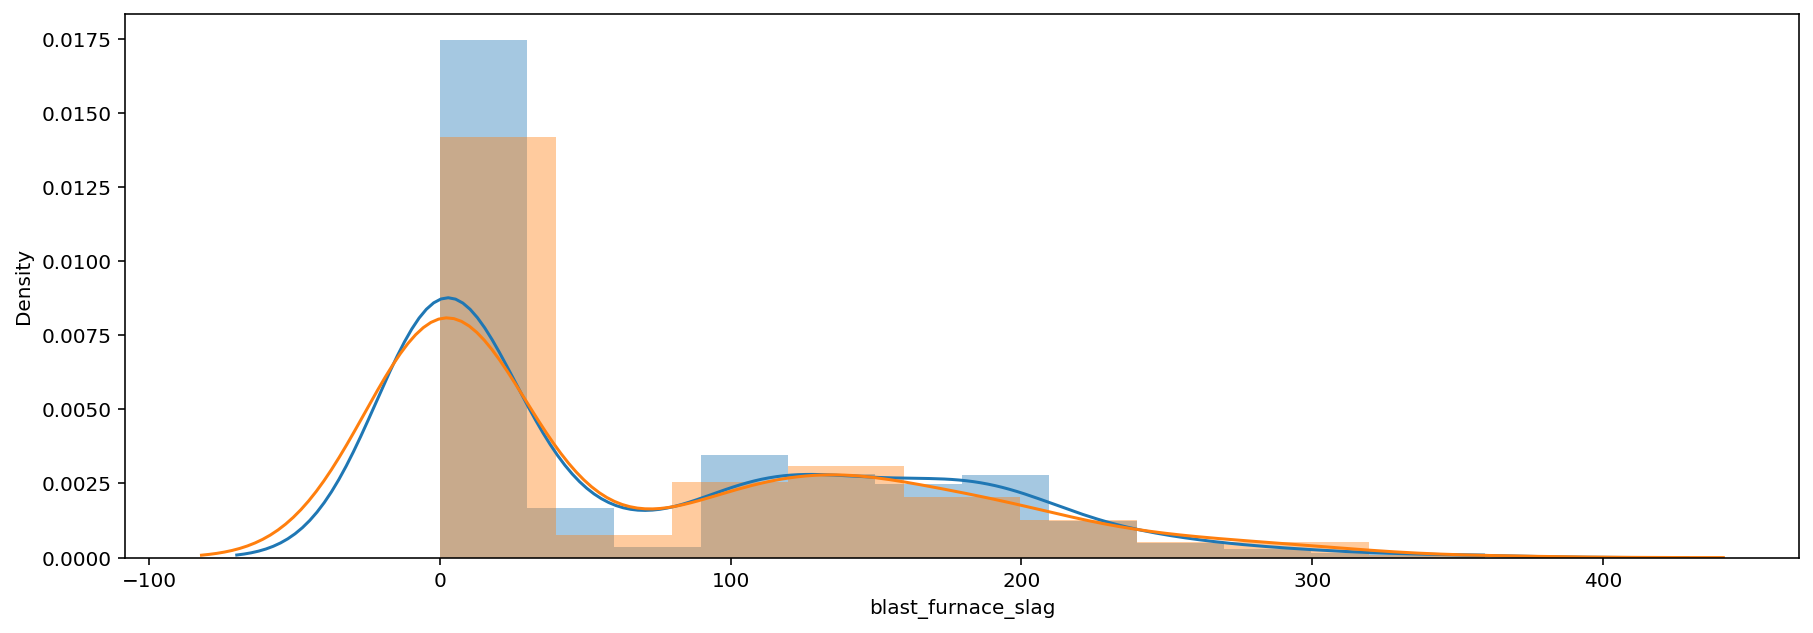

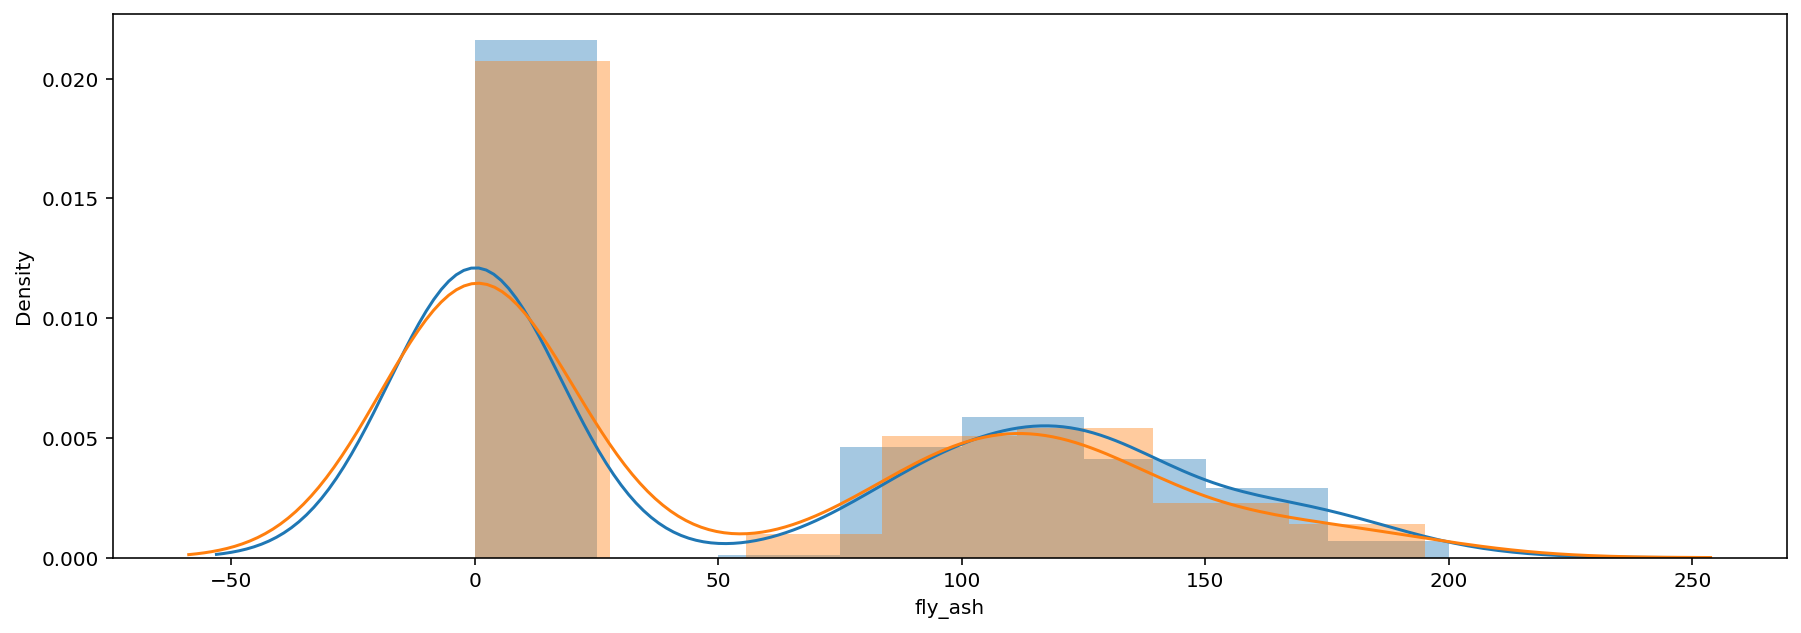

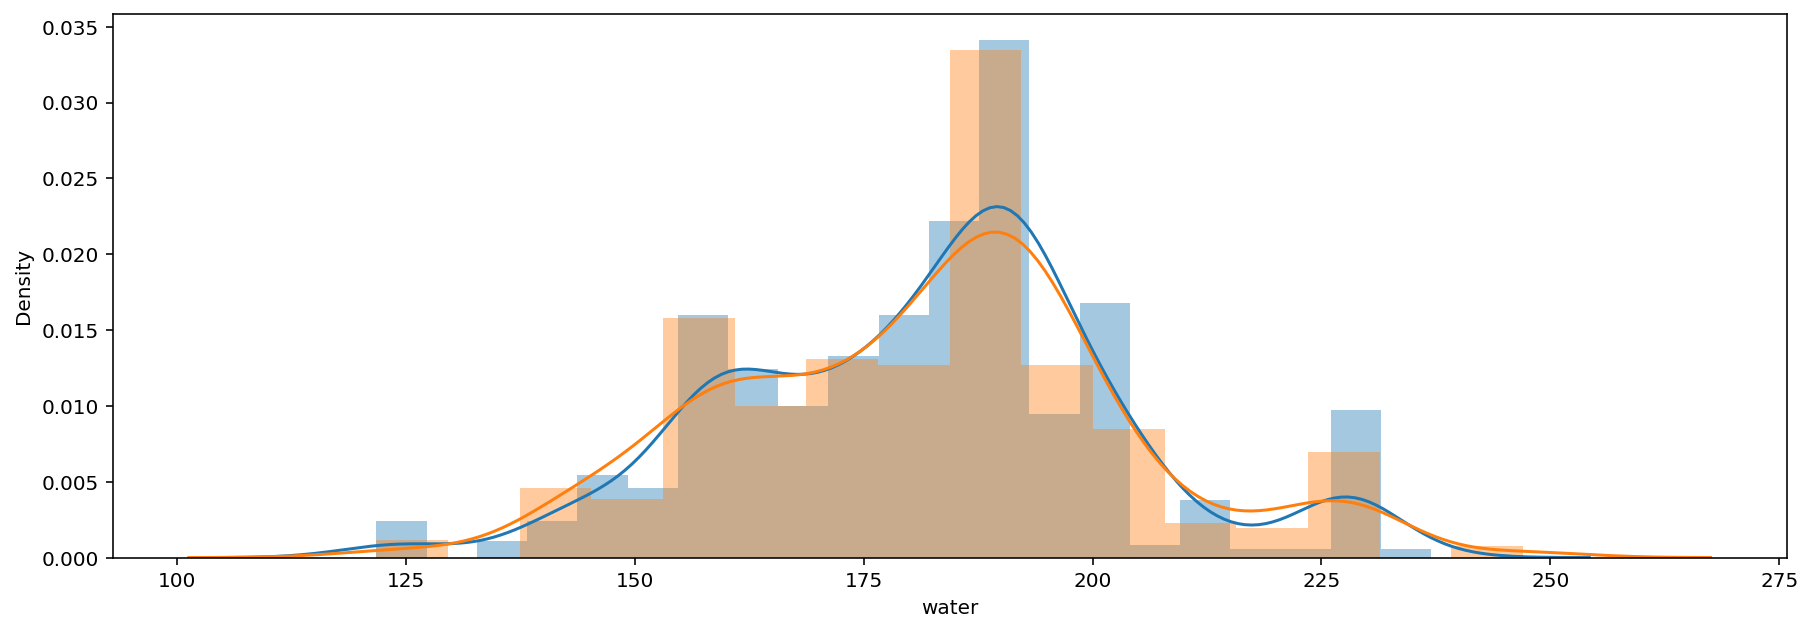

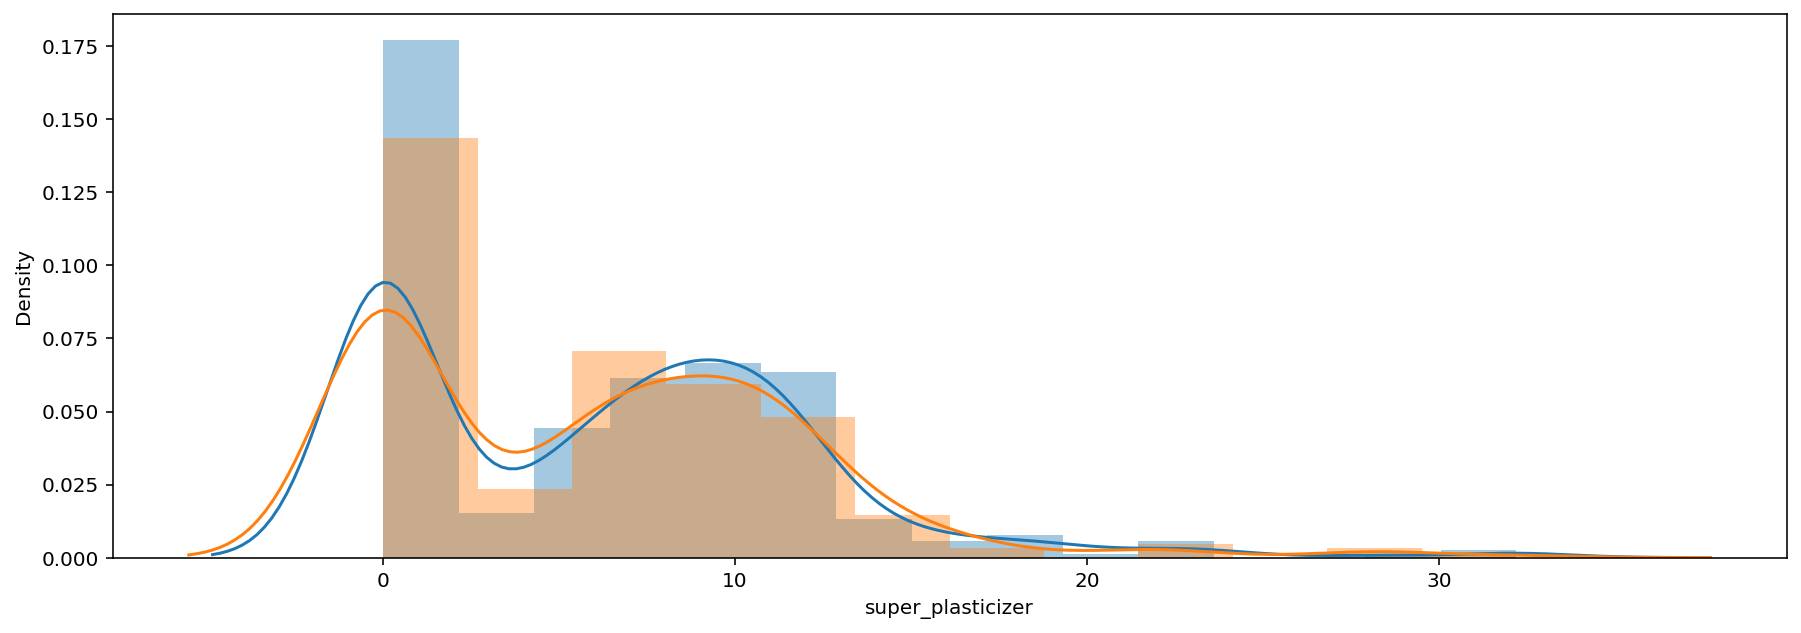

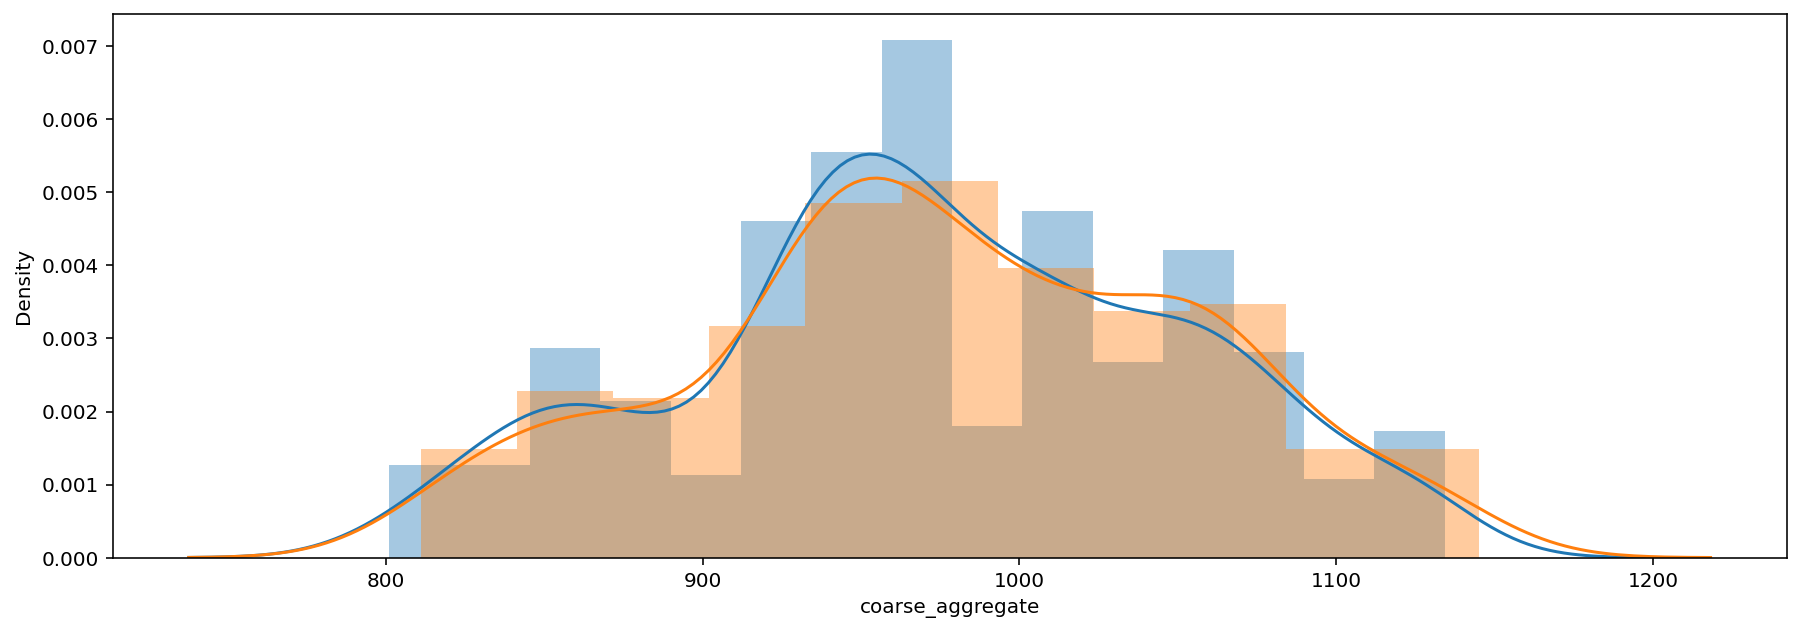

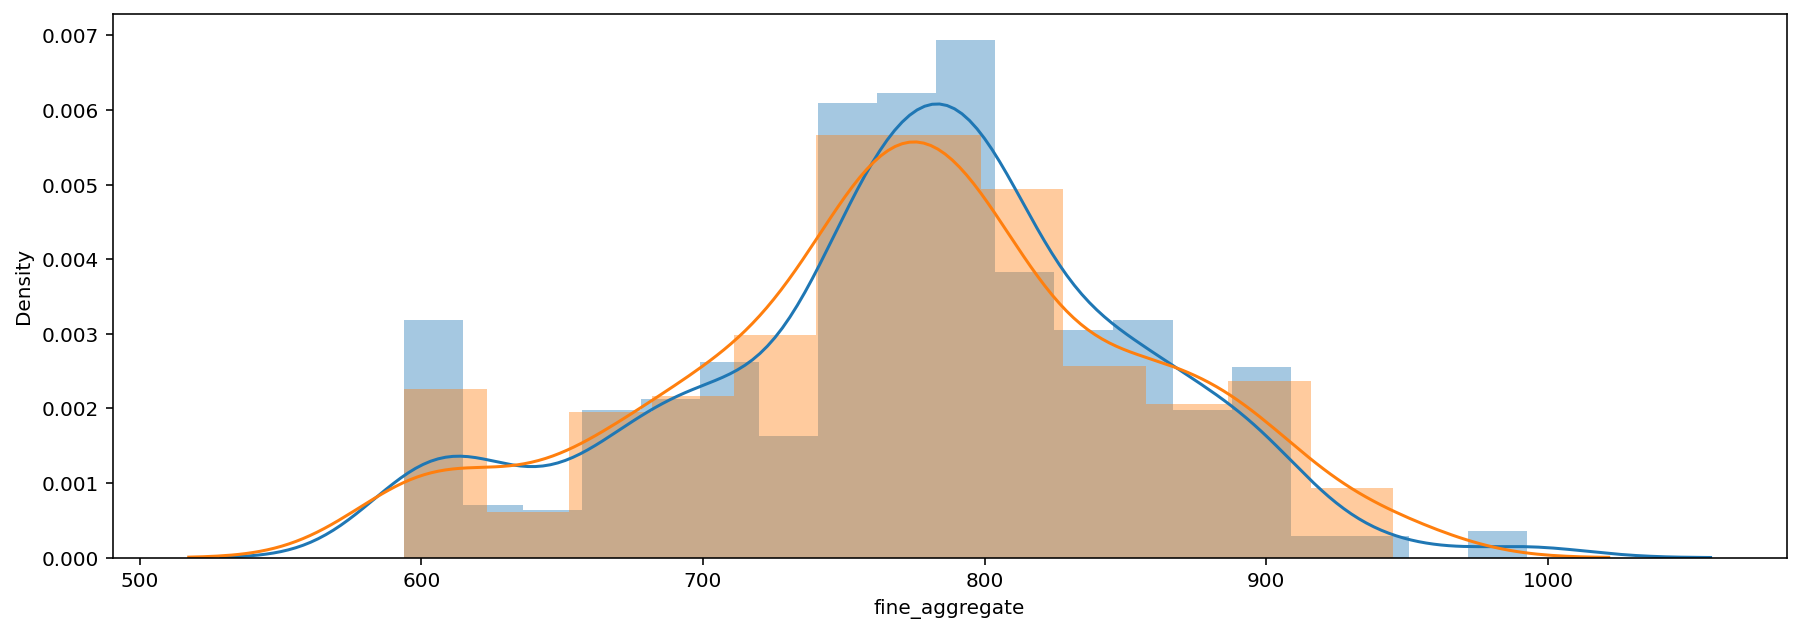

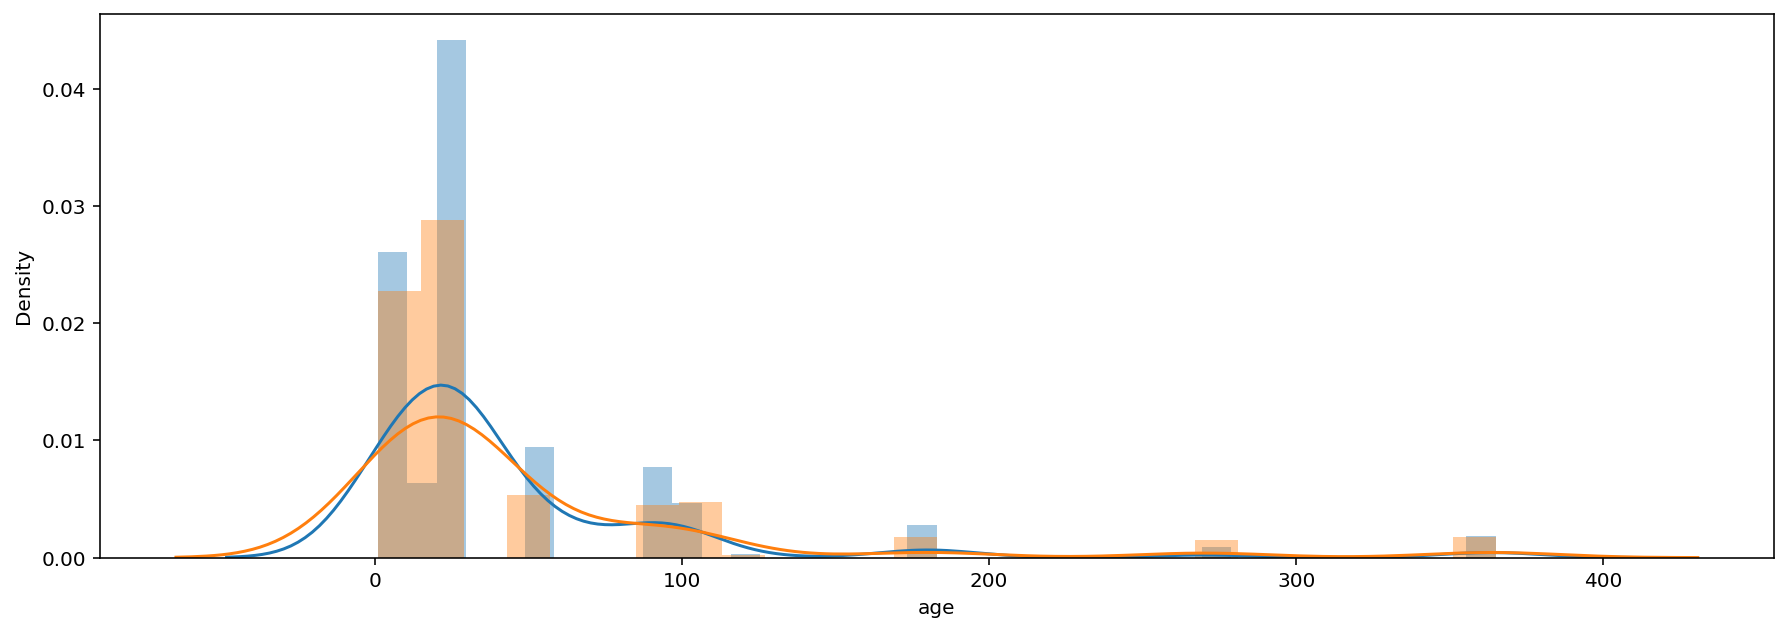

In [70]:
for col in X:
    plt.figure(figsize=(15,5))
    sns.distplot(X_train[col])
    sns.distplot(X_test[col])

## Preprocessing pipeline

### Encoding

### Scaling

In [12]:
# define standard scaler method
scaler = StandardScaler()

In [13]:
# standard scale features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Outliers treatment

In [12]:
# class OutlierRemover(BaseEstimator,TransformerMixin):
#     def __init__(self,factor=1.5):
#         self.factor = factor
#
#     def outlier_detector(self,X,y=None):
#         X = pd.Series(X).copy()
#         q1 = X.quantile(0.25)
#         q3 = X.quantile(0.75)
#         iqr = q3 - q1
#         self.lower_bound.append(q1 - (self.factor * iqr))
#         self.upper_bound.append(q3 + (self.factor * iqr))
#
#     def fit(self,X,y=None):
#         self.lower_bound = []
#         self.upper_bound = []
#         X.apply(self.outlier_detector)
#         return self
#
#     def transform(self,X,y=None):
#         X = pd.DataFrame(X).copy()
#         for i in range(X.shape[1]):
#             x = X.iloc[:, i].copy()
#             x[(x < self.lower_bound[i]) | (x > self.upper_bound[i])] = np.nan
#             X.iloc[:, i] = x
#         return X

------------------------------------

## Baseline preprocessing

## Model Instantiation

In [46]:
# model instantiation
model = Sequential()

In [ ]:
def get_model(input_shape, ):
    # Create a simple model.
    inputs = Input(shape=)
    outputs = Dense(1)(inputs)
    model = Model(inputs, outputs)
    model.compile(optimizer="adam", loss="mean_squared_error")
    return model

### Building

In [47]:
# model building
model.add(Dense(128, input_dim=X.shape[1], activation='relu')) # input layer
model.add(Dense(12, activation='relu')) # hidden layers
model.add(Dense(1, activation='linear')) # output layer

### Compilation

In [27]:
# # define determination coefficient custom metric (r2)
# def coeff_determination(y_true, y_pred):
#     SS_res =  K.sum(K.square( y_true-y_pred ))
#     SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
#     return (1 - SS_res/(SS_tot + K.epsilon()))

In [48]:
# model compilation for regression problem
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

### Training

In [49]:
# model fit
history = model.fit(X_train, y_train, validation_split=0.3, batch_size=32, epochs=500)

Epoch 1/500
15/15 [==============================] - 2s 31ms/step - loss: 1422.9863 - mae: 34.2006 - val_loss: 1402.3333 - val_mae: 34.0752
Epoch 2/500
15/15 [==============================] - 0s 9ms/step - loss: 1352.0287 - mae: 33.2164 - val_loss: 1322.9567 - val_mae: 32.9604
Epoch 3/500
15/15 [==============================] - 0s 9ms/step - loss: 1257.3333 - mae: 31.8813 - val_loss: 1219.9222 - val_mae: 31.4573
Epoch 4/500
15/15 [==============================] - 0s 8ms/step - loss: 1140.0680 - mae: 30.1245 - val_loss: 1090.7615 - val_mae: 29.4752
Epoch 5/500
15/15 [==============================] - 0s 8ms/step - loss: 993.8663 - mae: 27.8119 - val_loss: 939.8082 - val_mae: 26.9958
Epoch 6/500
15/15 [==============================] - 0s 7ms/step - loss: 827.4373 - mae: 24.9235 - val_loss: 766.9967 - val_mae: 23.9051
Epoch 7/500
15/15 [==============================] - 0s 8ms/step - loss: 646.1451 - mae: 21.5541 - val_loss: 591.5603 - val_mae: 20.4464
Epoch 8/500
15/15 [=============

KeyboardInterrupt: 

### Performance

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


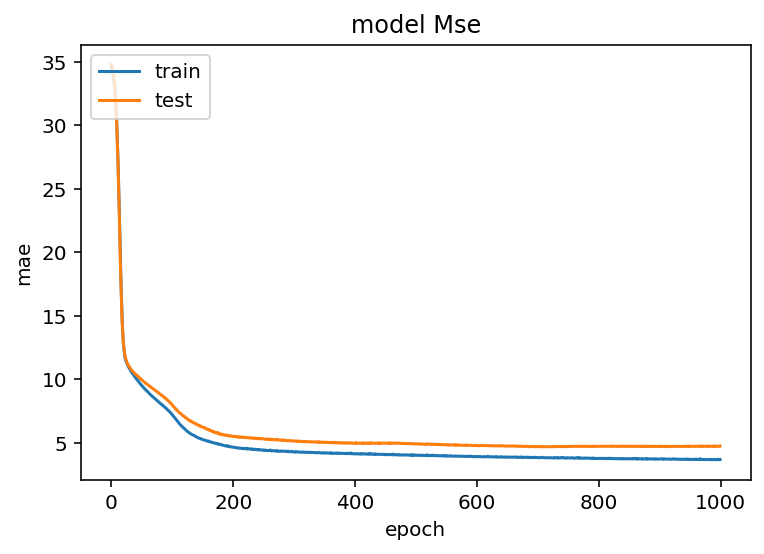

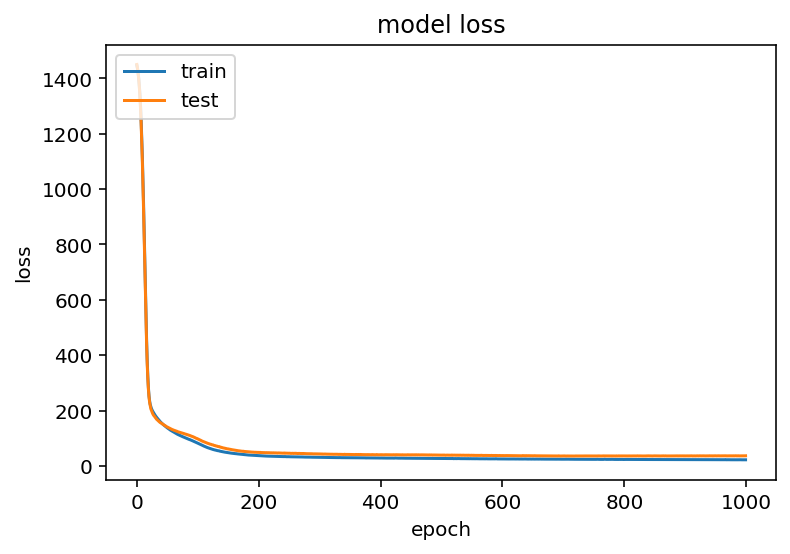

In [110]:
print(history.history.keys())
# summarize history for mean square error
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model Mse')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ML Tuning

-------------------------------